In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# from tensorflow import keras as k

In [3]:
path = r'C:\\Users\\Administrator\\Desktop\elephant\\OCR_test\\20190309162316.png'

def cv_show(img, name):
    cv2.imshow(name, img)
    cv2.waitKey()
    cv2.destroyAllWindows()

In [4]:
img = cv2.imread(path)
cv_show(img, 'img')

In [5]:
imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# print(imgGray.shape)
imgGray_r = cv2.resize(imgGray,(342,514))    #干，shape是按高宽显示，resize是按宽高显示，正好相反，太久没学习忘掉了........
# print(imgGray_r.shape)
# cv_show(imgGray_r,'imgGray_r')

In [6]:
kernel = np.ones((5,5),np.uint8)

imgcropped = imgGray_r[152:495, 67:253]    #先高后宽：从上到下，从左到右
# cv2.putText(imgcropped,"cute lady",(50,150),cv2.FONT_ITALIC,3,(255,0,255,1))
# imgcanny = cv2.Canny(imgcropped,150,200)

# imgEroded = cv2.erode(imgDilation,kernel,iterations=1)
# imgDilation = cv2.dilate(imgcropped,kernel,iterations=1)

# cv_show(imgcropped,'imgcropped')
# cv_show(imgcropped,'imgcropped')

In [7]:
# 以下利用高斯金字塔上下采样


up = cv2.pyrUp(imgGray_r)    #上采样：将图像在每个方向扩大为原来的两倍，新增的行列以0填充
# cv_show(up,'pyrUP')

In [8]:
down = cv2.pyrDown(imgGray_r)    #降采样
# cv_show(down,'pyrDown')

In [9]:
up_down = cv2.pyrUp(down)
# cv_show(up_down,'pyrup_down')

In [10]:
cv_show(np.hstack((imgGray_r, up_down,imgGray_r-up_down)),'compare')    #hstack是并排放置，vstack是纵排放置
#imgGray_r-up_down  这里进行了一次拉普拉斯金字塔采样

In [11]:
img_d = cv2.resize(img,(342,514))
img_C = img_d.copy()    #一定要copy原图再处理，不然会修改原图
ret, thresh = cv2.threshold(imgGray_r,127,255,cv2.THRESH_BINARY)    #阈值设置为127，超过该值则将像素点置为255
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# cv_show(thresh,'thresh')
res = cv2.drawContours(img_C, contours, -1, (0,0,255), 1)    #图像、第几条轮廓线(-1代表所有的)、图像索引、轮廓颜色、轮廓粗细
# x,y,w,h = cv2.boundingRect(contours[425])    #把某个轮廓线用矩形框起来，也可以用圆形框，改改函数就行
# res = cv2.rectangle(res,(x,y),(x+w,y+h),(255,0,0),2)
cv_show(res, 'res')

In [13]:
#整张图片的直方图Hist(一个概念：图像的直方图是用来表现图像中亮度分布的直方图,给出的是图像中某个亮度或者某个范围亮度下共有几个像素)
imgh = cv2.imread(path,0)    #0表示按灰度图读取
hist = cv2.calcHist([imgh],[0],None,[256],[0,256])    
#参数解释：读入的原图；
#通道（[0]代表灰度图，彩图可使用[0][1][2]，数字分别指BGR三个通道）；
#掩模图像，即mask，None表示对整张图做处理，如果仅处理图的一部分则需要自己制作一个掩模使用；
#直方图中箱体的数量
#直方图中每一个箱体的取值范围
hist.shape

(256, 1)

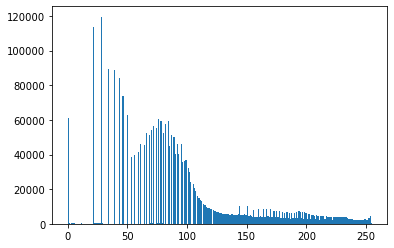

In [16]:
plt.hist(imgh.ravel(),256)
plt.show()

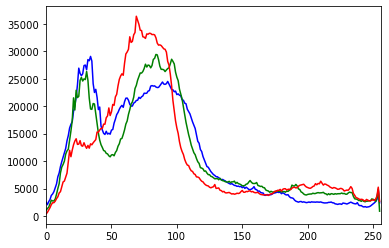

In [18]:
imgc = cv2.imread(path)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([imgc],[i],None,[256],[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,256])